In [1]:
from ROOT import TH1D, TCanvas, TH2F, TH1F, TFile, TTree, gDirectory
import ROOT
from array import array

Welcome to JupyROOT 6.20/06


In [2]:
myfile = TFile( '/eos/home-m/matheus/experiment.root' )
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()

# Exercício 1 #

Revise o script para desenhar o histograma chi2 com barras de erro.

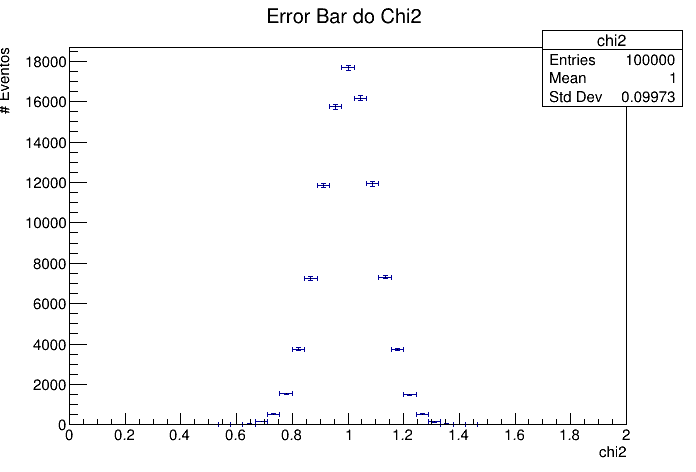

In [3]:
chi2Hist = TH1D("chi2","Error Bar do Chi2", 45, 0, 2)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    chi2 = mychain.chi2
    chi2Hist.Fill(chi2)
    if nb <= 0:
        continue

canvas = TCanvas()
chi2Hist.GetXaxis().SetTitle("chi2")
chi2Hist.GetYaxis().SetTitle("# Eventos")
chi2Hist.Draw('E1SAME')
canvas.Draw()

# Exercício 2 #

Revise o script para criar, arquivar e exibir um histograma adicional da variável ebeam (com barras de erro e rótulos de eixo).

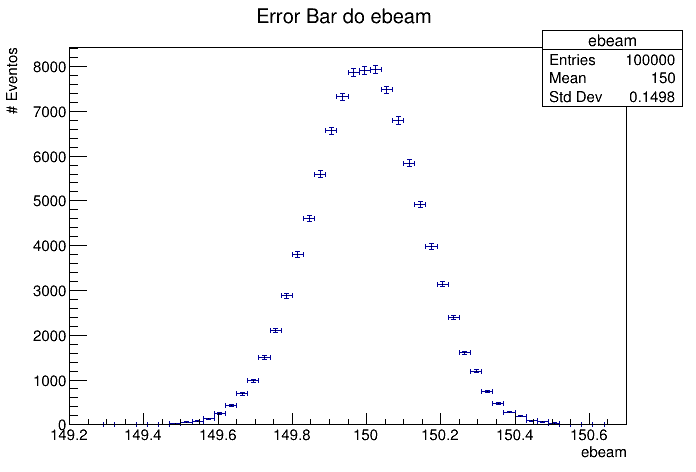

In [4]:
ebeamHist = TH1D("ebeam","Error Bar do ebeam", 50, 149.2, 150.7)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    ebeamHist.Fill(ebeam)
    if nb <= 0:
        continue

canvas_ebeam = TCanvas()
ebeamHist.GetXaxis().SetTitle("ebeam")
ebeamHist.GetYaxis().SetTitle("# Eventos")
ebeamHist.Draw('E1SAME')
canvas_ebeam.Draw()

# Exercício 3 

Fit o histograma ebeam a uma distribuição gaussiana.

 FCN=52.4196 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=8.04696e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.98393e+03   3.08842e+01   9.01256e-02   2.60069e-08
   2  Mean         1.49999e+02   4.74197e-04   7.15253e-05   2.28951e-03
   3  Sigma        1.49834e-01   3.33931e-04   2.16577e-06   5.89517e-04


Warning in <TFile::Append>: Replacing existing TH1: ebeam (Potential memory leak).


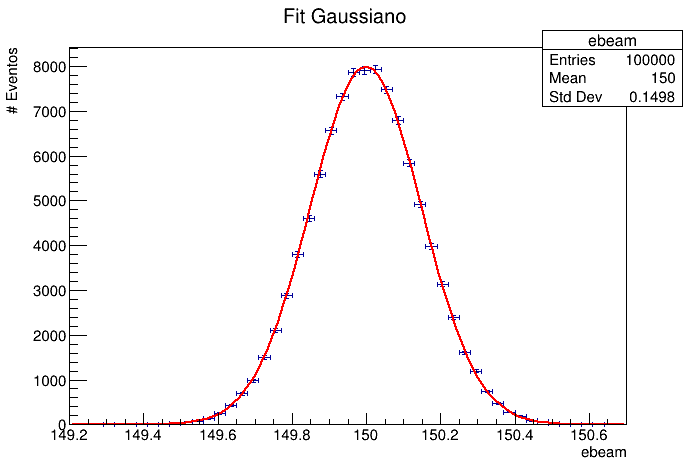

In [5]:
ebeamHist_fit = TH1F("ebeam","Fit Gaussiano", 50, 149.2, 150.7)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    ebeam_fit = mychain.ebeam
    ebeamHist_fit.Fill(ebeam_fit)
    if nb <= 0:
        continue

canvas_ebeam_fit = TCanvas()
ebeamHist_fit.GetXaxis().SetTitle("ebeam")
ebeamHist_fit.GetYaxis().SetTitle("# Eventos")
ebeamHist_fit.Draw('E1SAME')
ebeamHist_fit.Fit("gaus", "S")
canvas_ebeam_fit.Draw()

# Exercicio 4

Adicione outro gráfico: um gráfico de dispersão de chi2 versus ebeam. Não se esqueça de rotular os eixos!


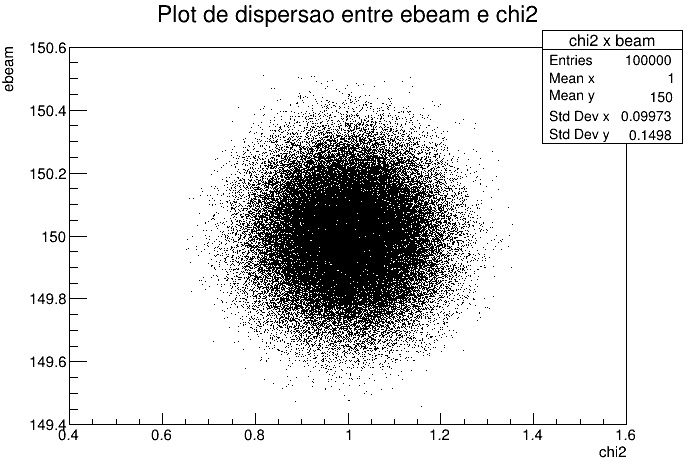

In [6]:
ScatterHist = TH2F("chi2 x beam", "Plot de dispersao entre ebeam e chi2", 100, 0.4, 1.6, 100, 149.4, 150.6)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    chi2 = mychain.chi2
    ScatterHist.Fill(chi2,ebeam)
    if nb <= 0:
        continue
        
canvas_Scatter = TCanvas()
ScatterHist.GetXaxis().SetTitle("chi2")
ScatterHist.GetYaxis().SetTitle("ebeam")
ScatterHist.Draw("scat=0.8")
canvas_Scatter.Draw()

# Exercício 5 

Calcule $p_T = \sqrt{p_x^2 + p_y^2}$ em uma macro de análise e faça um histograma da variável

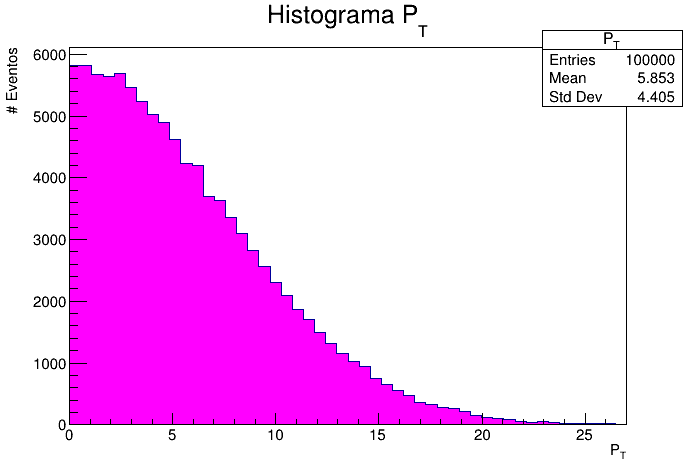

In [7]:
PtHist = TH1D("P_{T}","Histograma P_{T}", 50, 0, 27)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pt = ( px**2 + py**2 )**0.5
    PtHist.Fill(pt)
    if nb <= 0:
        continue
        
canvas_pt = TCanvas()
PtHist.GetXaxis().SetTitle("P_{T}")
PtHist.GetYaxis().SetTitle("# Eventos")
PtHist.SetFillColor(6)
PtHist.Draw()
canvas_pt.Draw()

# Exercicio 6

Inclui um histograma da quantidade teta, ou o ângulo que o feixe faz com o eixo z, e é calculado por $\theta = arctan\left(\frac{p_T}{p_Z}\right)$.

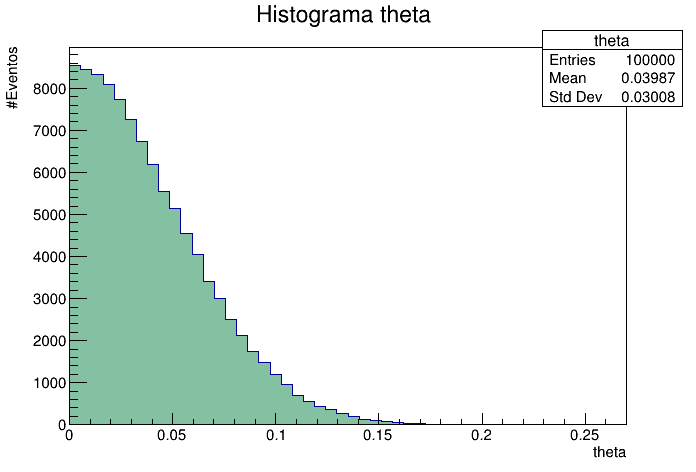

In [8]:
thetaHist = TH1D("theta","Histograma theta ", 50, 0, 0.27)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    px = mychain.px
    py = mychain.py
    pz = mychain.pz
    pt = ( px**2 + py**2 )**0.5
    theta = ROOT.TMath.ATan(pt/pz)
    #print(theta)
    thetaHist.Fill(theta)
    if nb <= 0:
        continue

canvas_theta = TCanvas()
thetaHist.GetXaxis().SetTitle("theta")
thetaHist.GetYaxis().SetTitle("#Eventos")
thetaHist.SetFillColor(30)
thetaHist.Draw()
canvas_theta.Draw()

# Exercício 7

Aplique um corte em sua macro de análise. Sua meta é contar o número de eventos para os quais pz é menor que 145 geV e, em seguida, exibir o valor. Dica: inclua a seguinte instrução em sua seção de finalização: print "O número de eventos com pz <145 é", pzCount

The number of events with pz < 145 is 14962.0


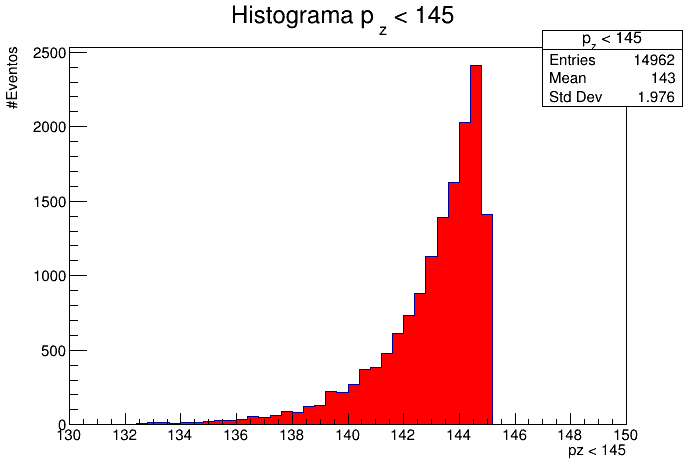

In [9]:
pz_cut_Hist = TH1D("p_{z} < 145","Histograma p_{z} < 145 ", 50, 130, 150)

for jentry in range( entries ):
    # Copy next entry into memory and verify.
    nb = mychain.GetEntry( jentry )
    pz = mychain.pz
    if pz < 145:
        #print(theta)
        pz_cut_Hist.Fill(pz)
        
    if nb <= 0:
        continue

canvas_pz_count = TCanvas()
pz_cut_Hist.GetXaxis().SetTitle("pz < 145")
pz_cut_Hist.GetYaxis().SetTitle("#Eventos")
pz_cut_Hist.SetFillColor(2)
pz_cut_Hist.Draw()
canvas_pz_count.Draw()
print("The number of events with pz < 145 is", pz_cut_Hist.GetEntries()) # O .GetEntries() nos retorna o número de entradas do histograma, isto é, quantos eventos eu tenho nesse corte

# Exercício 8

Revise seu código para gravar os histogramas em um arquivo.

In [10]:
file = TFile("experiment-output.root","recreate")

In [11]:
chi2Hist.Write()
ebeamHist.Write()
ebeamHist_fit.Write()
ScatterHist.Write()
PtHist.Write()
pz_cut_Hist.Write()
file.Write()
file.Close()